In [18]:
import os
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


In [3]:
with open(os.path.join('..', 'file-pkl', 'base-census.pkl'), 'rb') as f:
    x_census_training, x_census_test, y_census_training, y_census_test = pickle.load(f)

In [5]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [6]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [9]:
base_census_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [10]:
base_census_tree.fit(x_census_training, y_census_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
predict = base_census_tree.predict(x_census_test)
predict

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [13]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [15]:
accuracy_score(y_census_test, predict)

0.8104401228249745

0.8104401228249745

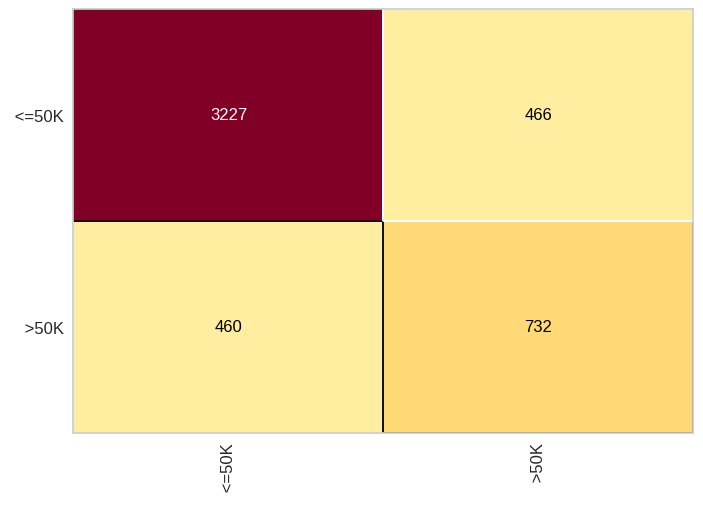

In [17]:
cm = ConfusionMatrix(base_census_tree)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [19]:
# recall - algoritmo consegue identificar corretamento
# precision - quando identifica um registro tem precisão
# f1-score - média harmônica entre precision e recall
print(classification_report(y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

